In [ ]:
## Practica 02: Perceptron


Entrenando Perceptrón para la compuerta AND...
Pesos finales: [2. 1.]
Bias final: -2.0

Prueba del perceptrón AND:
Entrada: [0 0], Salida: 0
Entrada: [0 1], Salida: 0
Entrada: [1 0], Salida: 0
Entrada: [1 1], Salida: 1

----------------------------------------


Entrenando Perceptrón para la compuerta OR...
Pesos finales: [1. 1.]
Bias final: 0.0

Prueba del perceptrón OR:
Entrada: [0 0], Salida: 0
Entrada: [0 1], Salida: 1
Entrada: [1 0], Salida: 1
Entrada: [1 1], Salida: 1

Entrenando Perceptrón para la compuerta AND...


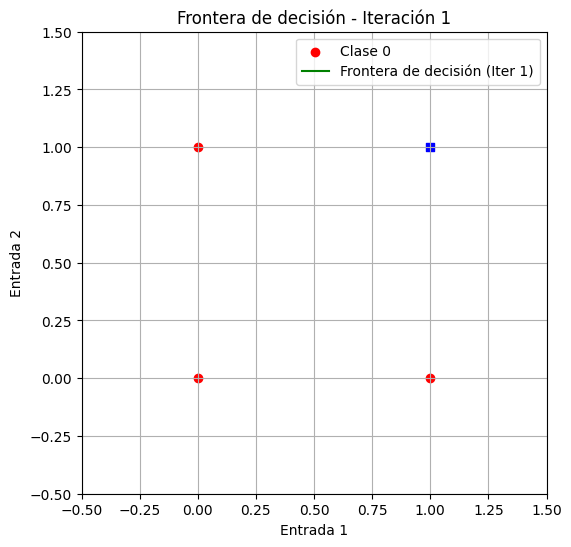

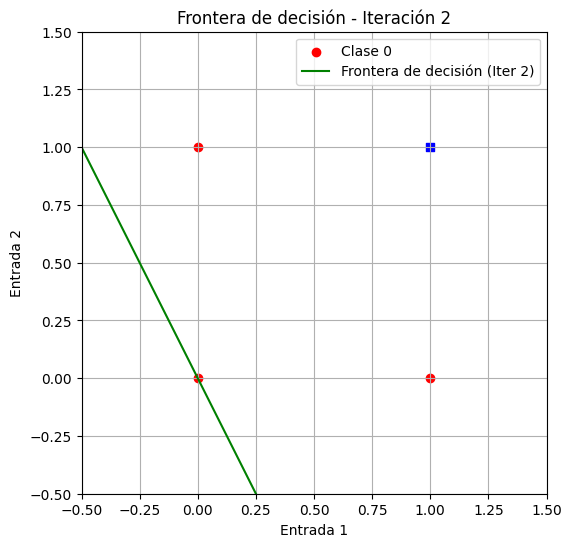

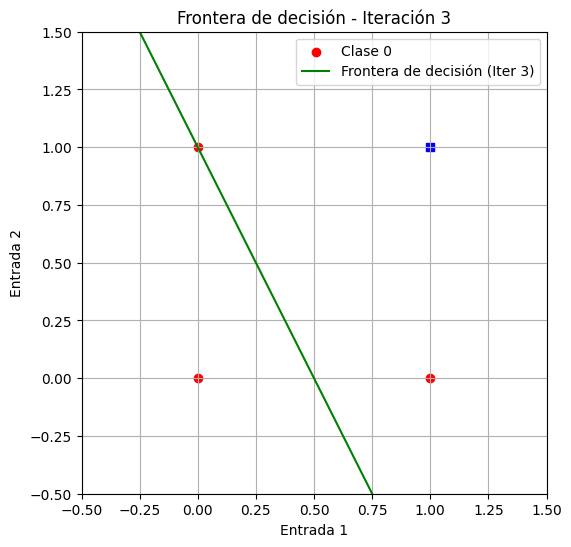

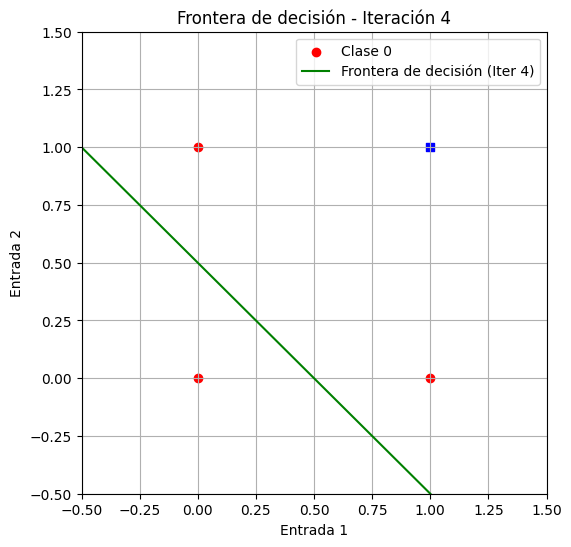

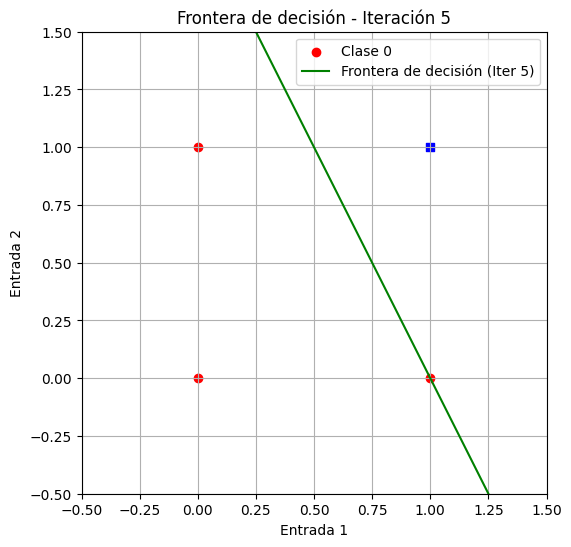

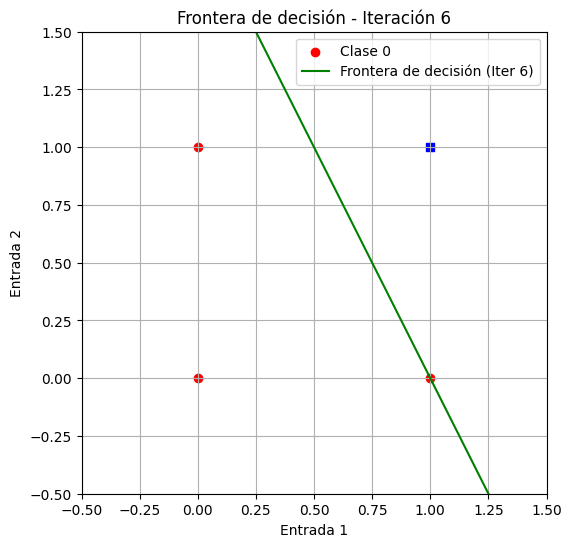

Pesos finales: [2. 1.]
Bias final: -2.0

Prueba del perceptrón AND:
Entrada: [0 0], Salida: 0
Entrada: [0 1], Salida: 0
Entrada: [1 0], Salida: 0
Entrada: [1 1], Salida: 1

----------------------------------------


Entrenando Perceptrón para la compuerta OR...


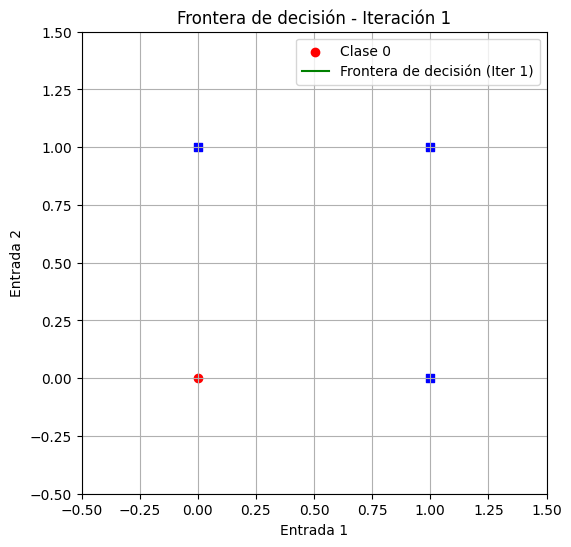

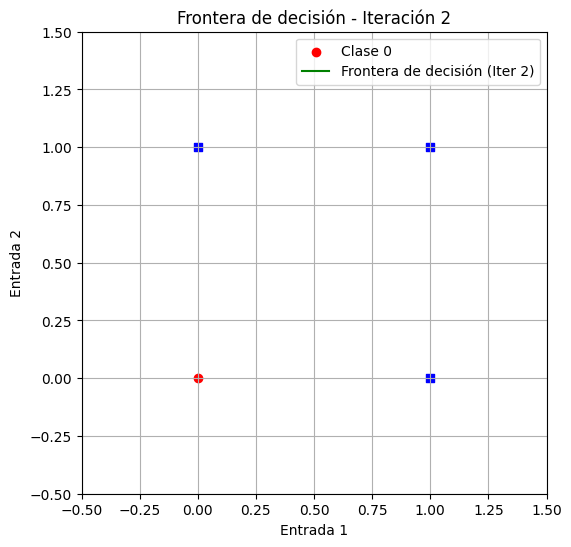

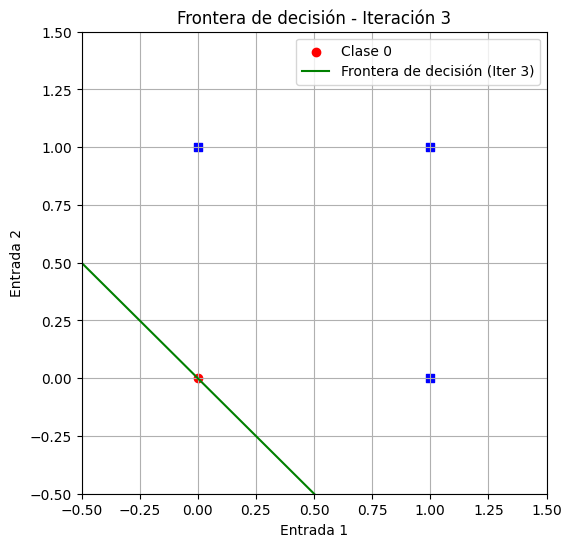

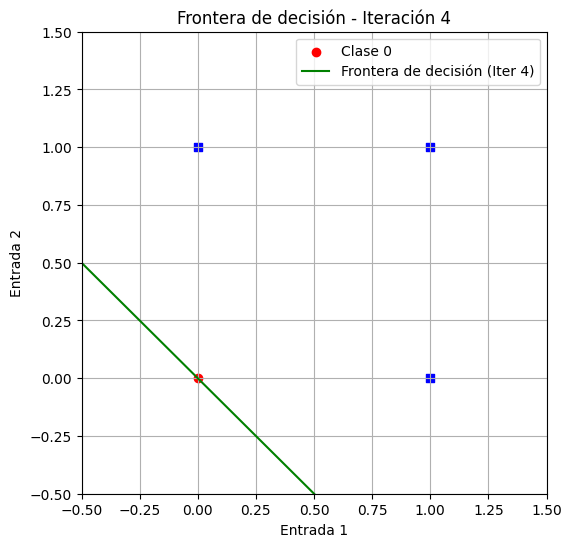

Pesos finales: [1. 1.]
Bias final: 0.0

Prueba del perceptrón OR:
Entrada: [0 0], Salida: 0
Entrada: [0 1], Salida: 1
Entrada: [1 0], Salida: 1
Entrada: [1 1], Salida: 1


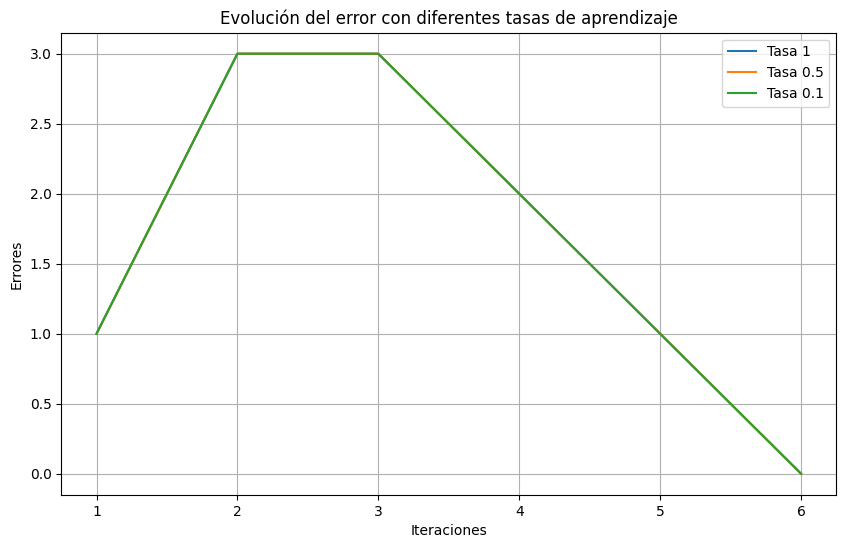

Tasa de aprendizaje 1: Convergió en 6 iteraciones
Tasa de aprendizaje 0.5: Convergió en 6 iteraciones
Tasa de aprendizaje 0.1: Convergió en 6 iteraciones


In [ ]:
#Parte 1
import numpy as np

#1 perceptron simple
def perceptron(entradas, pesos, bias):
    neta = np.dot(entradas, pesos) + bias
    return 1 if neta > 0 else 0

#2 Regla de aprendizaje
def aprendizaje_pesos(entrada, target, peso, bias, tasa_aprendizaje):
    salida = perceptron(entrada, peso, bias)
    error = target - salida
    peso += tasa_aprendizaje * error * entrada
    bias += tasa_aprendizaje * error
    return peso, bias, error

#2 Ajuste de pesos
def entrenamiento(entradas, target, pesos, bias, tasa_aprendizaje, max_iter=100):
    for _ in range(max_iter):
        errores = 0
        for i in range(len(entradas)):
            pesos, bias, error = aprendizaje_pesos(entradas[i], target[i], pesos, bias, tasa_aprendizaje)
            errores += abs(error)
        if errores == 0:
            break
    return pesos, bias

#3 Resolver el problema AND
def AND(entradas, pesos, bias, tasa_aprendizaje, target):
    print("\nEntrenando Perceptrón para la compuerta AND...")
    pesos, bias = entrenamiento(entradas, target, pesos, bias, tasa_aprendizaje)
    print("Pesos finales:", pesos)
    print("Bias final:", bias)

    print("\nPrueba del perceptrón AND:")
    for entrada in entradas:
        salida = perceptron(entrada, pesos, bias)
        print(f"Entrada: {entrada}, Salida: {salida}")

    return pesos, bias

#3 Resolver los problemas OR
def OR(entradas, pesos, bias, tasa_aprendizaje, target):
    print("\nEntrenando Perceptrón para la compuerta OR...")
    pesos, bias = entrenamiento(entradas, target, pesos, bias, tasa_aprendizaje)
    print("Pesos finales:", pesos)
    print("Bias final:", bias)

    print("\nPrueba del perceptrón OR:")
    for entrada in entradas:
        salida = perceptron(entrada, pesos, bias)
        print(f"Entrada: {entrada}, Salida: {salida}")

    return pesos, bias

# Función principal
def main():
    entradas = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    tasa_aprendizaje = 1

    pesos_and = np.array([0.0, 0.0])
    bias_and = 0.0
    target_and = np.array([0, 0, 0, 1])
    pesos_and, bias_and = AND(entradas, pesos_and, bias_and, tasa_aprendizaje, target_and)

    print("\n" + "-" * 40 + "\n")
    pesos_or = np.array([0.0, 0.0])
    bias_or = 0.0
    target_or = np.array([0, 1, 1, 1])
    pesos_or, bias_or = OR(entradas, pesos_or, bias_or, tasa_aprendizaje, target_or)

if __name__ == "__main__":
    main()

#4 Graficar la frontera de decision
import numpy as np
import matplotlib.pyplot as plt

def perceptron(entradas, pesos, bias):
    neta = np.dot(entradas, pesos) + bias
    return 1 if neta > 0 else 0


def aprendizaje_pesos(entrada, target, peso, bias, tasa_aprendizaje):
    salida = perceptron(entrada, peso, bias)
    error = target - salida
    peso += tasa_aprendizaje * error * entrada
    bias += tasa_aprendizaje * error
    return peso, bias, error

def graficar_frontera(entradas, pesos, bias, iteracion, target):
    plt.figure(figsize=(6, 6))

    for i, entrada in enumerate(entradas):
        if target[i] == 0:
            plt.scatter(entrada[0], entrada[1], color='red', marker='o', label="Clase 0" if i == 0 else "")
        else:
            plt.scatter(entrada[0], entrada[1], color='blue', marker='s', label="Clase 1" if i == 0 else "")

    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)


    x_vals = np.linspace(x_min, x_max, 100)
    if pesos[1] != 0:
        y_vals = -(pesos[0] * x_vals + bias) / pesos[1]
        plt.plot(x_vals, y_vals, 'g-', label=f'Frontera de decisión (Iter {iteracion})')

    plt.xlabel("Entrada 1")
    plt.ylabel("Entrada 2")
    plt.title(f"Frontera de decisión - Iteración {iteracion}")
    plt.legend()
    plt.grid()
    plt.show()

def entrenamiento(entradas, target, pesos, bias, tasa_aprendizaje, max_iter=10):
    for iteracion in range(max_iter):
        errores = 0
        for i in range(len(entradas)):
            pesos, bias, error = aprendizaje_pesos(entradas[i], target[i], pesos, bias, tasa_aprendizaje)
            errores += abs(error)

        graficar_frontera(entradas, pesos, bias, iteracion + 1, target)

        if errores == 0:
            break
    return pesos, bias

def AND(entradas, pesos, bias, tasa_aprendizaje, target):
    print("\nEntrenando Perceptrón para la compuerta AND...")
    pesos, bias = entrenamiento(entradas, target, pesos, bias, tasa_aprendizaje)
    print("Pesos finales:", pesos)
    print("Bias final:", bias)

    print("\nPrueba del perceptrón AND:")
    for entrada in entradas:
        salida = perceptron(entrada, pesos, bias)
        print(f"Entrada: {entrada}, Salida: {salida}")

    return pesos, bias

def OR(entradas, pesos, bias, tasa_aprendizaje, target):
    print("\nEntrenando Perceptrón para la compuerta OR...")
    pesos, bias = entrenamiento(entradas, target, pesos, bias, tasa_aprendizaje)
    print("Pesos finales:", pesos)
    print("Bias final:", bias)

    print("\nPrueba del perceptrón OR:")
    for entrada in entradas:
        salida = perceptron(entrada, pesos, bias)
        print(f"Entrada: {entrada}, Salida: {salida}")

    return pesos, bias

def main():
    entradas = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    tasa_aprendizaje = 1

    pesos_and = np.array([0.0, 0.0])
    bias_and = 0.0
    target_and = np.array([0, 0, 0, 1])
    pesos_and, bias_and = AND(entradas, pesos_and, bias_and, tasa_aprendizaje, target_and)

    print("\n" + "-" * 40 + "\n")

    pesos_or = np.array([0.0, 0.0])
    bias_or = 0.0
    target_or = np.array([0, 1, 1, 1])
    pesos_or, bias_or = OR(entradas, pesos_or, bias_or, tasa_aprendizaje, target_or)

# Ejecuta la función principal
if __name__ == "__main__":
    main()


#5 Modifica el parametro de aprendizaje y evaluar el desempeño con tres valores deiferentes 1, 0.5 y 0.1
import numpy as np
import matplotlib.pyplot as plt

def perceptron(entradas, pesos, bias):
    neta = np.dot(entradas, pesos) + bias
    return 1 if neta > 0 else 0

def aprendizaje_pesos(entrada, target, peso, bias, tasa_aprendizaje):
    salida = perceptron(entrada, peso, bias)
    error = target - salida
    peso += tasa_aprendizaje * error * entrada
    bias += tasa_aprendizaje * error
    return peso, bias, error

def entrenamiento(entradas, target, pesos, bias, tasa_aprendizaje, max_iter=100):
    errores_totales = []
    for iteracion in range(max_iter):
        errores = 0
        for i in range(len(entradas)):
            pesos, bias, error = aprendizaje_pesos(entradas[i], target[i], pesos, bias, tasa_aprendizaje)
            errores += abs(error)
        errores_totales.append(errores)
        if errores == 0:
            break
    return pesos, bias, iteracion + 1, errores_totales

def evaluar_tasas_aprendizaje():
    entradas = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    target_and = np.array([0, 0, 0, 1])
    tasas = [1, 0.5, 0.1]
    resultados = {}

    plt.figure(figsize=(10, 6))

    for tasa in tasas:
        pesos = np.array([0.0, 0.0])
        bias = 0.0
        pesos, bias, iteraciones, errores_totales = entrenamiento(entradas, target_and, pesos, bias, tasa)
        resultados[tasa] = iteraciones
        plt.plot(range(1, len(errores_totales) + 1), errores_totales, label=f'Tasa {tasa}')

    plt.xlabel("Iteraciones")
    plt.ylabel("Errores")
    plt.title("Evolución del error con diferentes tasas de aprendizaje")
    plt.legend()
    plt.grid()
    plt.show()

    for tasa, iteraciones in resultados.items():
        print(f"Tasa de aprendizaje {tasa}: Convergió en {iteraciones} iteraciones")

evaluar_tasas_aprendizaje()



Evaluando con tasa de aprendizaje: 1
Clase 0: Precisión = 0.98


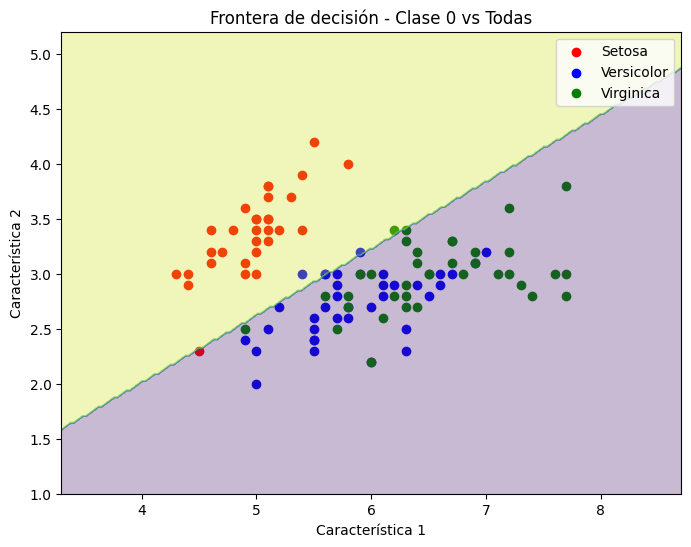

Clase 1: Precisión = 0.73


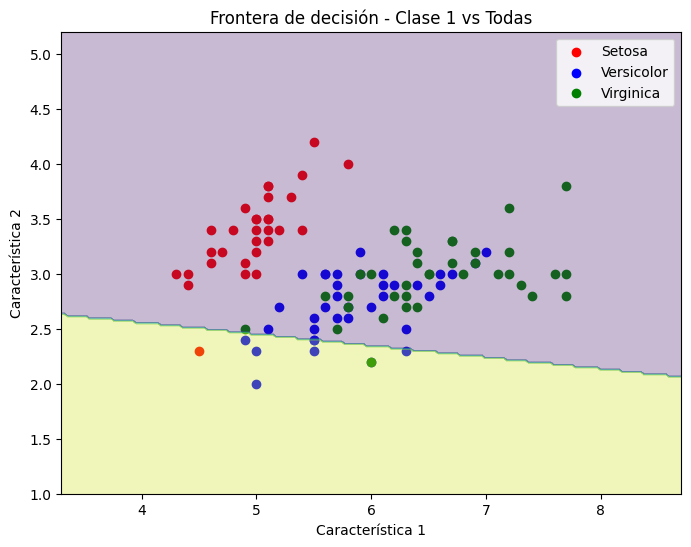

Clase 2: Precisión = 0.87


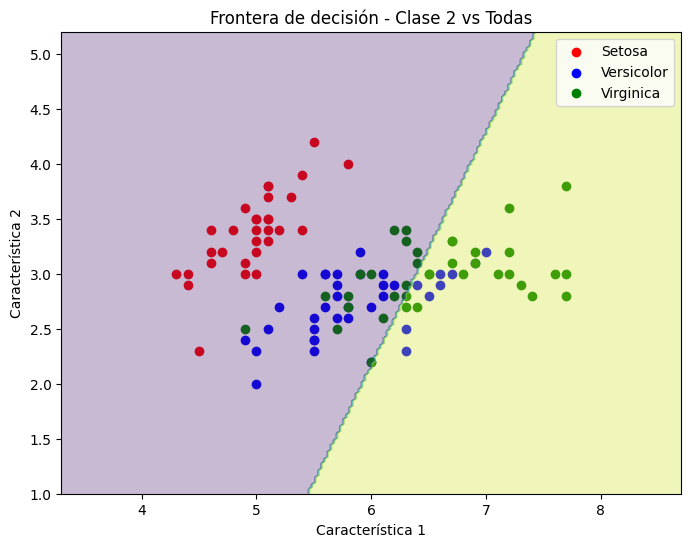

Precisión media con tasa 1: 0.86

Evaluando con tasa de aprendizaje: 0.5
Clase 0: Precisión = 0.98


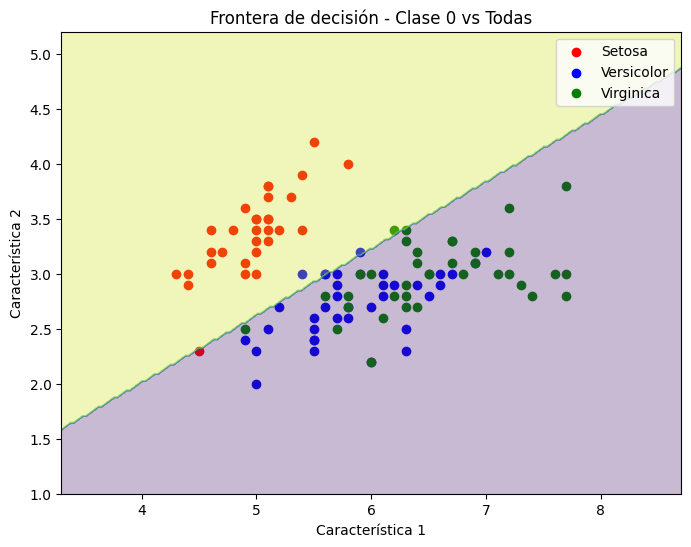

Clase 1: Precisión = 0.73


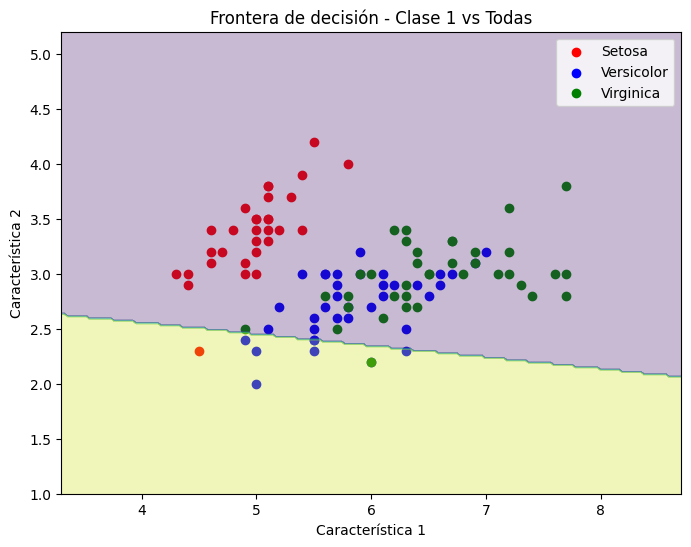

Clase 2: Precisión = 0.87


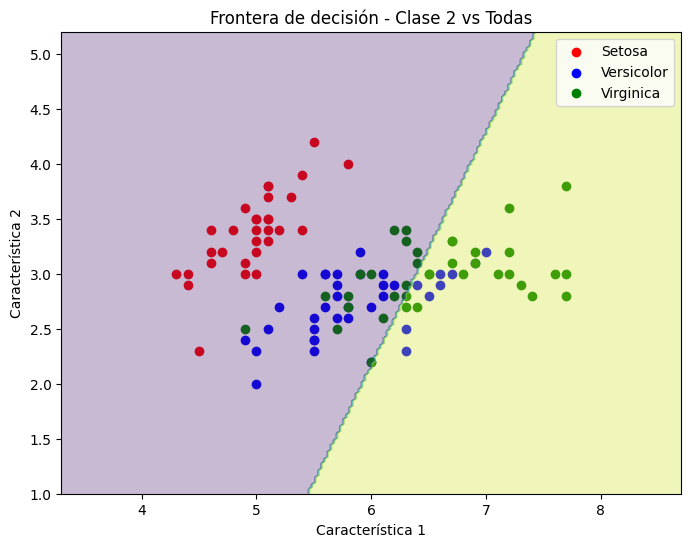

Precisión media con tasa 0.5: 0.86

Evaluando con tasa de aprendizaje: 0.1
Clase 0: Precisión = 0.98


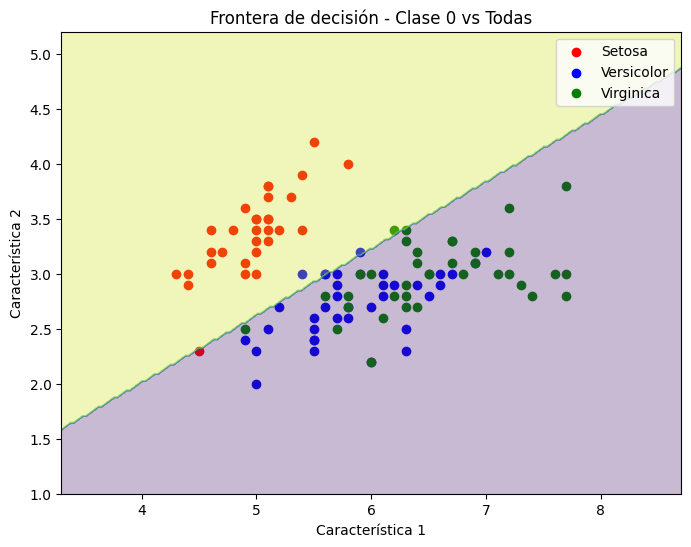

Clase 1: Precisión = 0.73


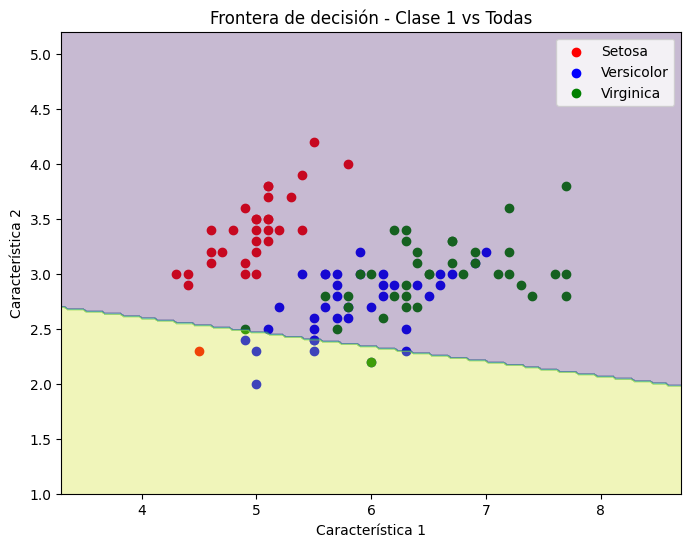

Clase 2: Precisión = 0.87


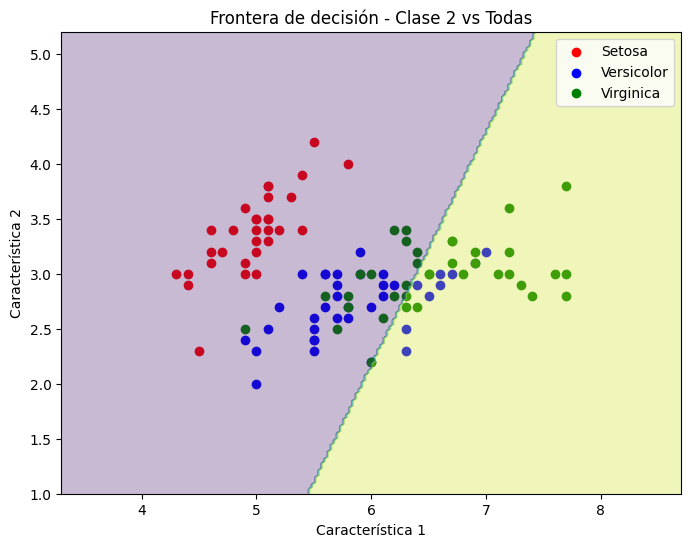

Precisión media con tasa 0.1: 0.86


In [ ]:
#Parte 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Cargar el conjunto de datos de Iris y dividirlo en entrenamiento y prueba.
iris = datasets.load_iris()
X = iris.data[:, :2]  # Solo tomamos las primeras dos características para visualización
y = iris.target  # Clases (0: Setosa, 1: Versicolor, 2: Virginica)

# Dividir los datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convertir las etiquetas para el enfoque "Uno vs Todos"
def convertir_clase(y, clase):
    """
    Convierte la clasificación en binaria:
    - 1 si pertenece a la clase específica.
    - 0 si pertenece a otra clase.
    """
    return np.where(y == clase, 1, 0)

# 2. Implementar un enfoque de clasificación "Uno vs Todos" utilizando perceptrones simples.
def entrenamiento(entradas, target, pesos, bias, tasa_aprendizaje, max_iter=100):
    """
    Entrena un perceptrón simple utilizando la regla de aprendizaje:
    - Ajusta los pesos en función del error de clasificación.
    - Se detiene si no hay errores o si se alcanza el número máximo de iteraciones.
    """
    for _ in range(max_iter):
        errores = 0
        for i in range(len(entradas)):
            salida = perceptron(entradas[i], pesos, bias)
            error = target[i] - salida
            pesos += tasa_aprendizaje * error * entradas[i]
            bias += tasa_aprendizaje * error
            errores += abs(error)
        if errores == 0:
            break
    return pesos, bias

# 3. Entrenar y evaluar el modelo en cada una de las tres clases del conjunto de datos Iris.
def perceptron(entradas, pesos, bias):
    """
    Implementación de un perceptrón simple:
    - Calcula la sumatoria ponderada.
    - Aplica la función escalón (umbral 0).
    """
    neta = np.dot(entradas, pesos) + bias
    return 1 if neta > 0 else 0

def graficar_frontera(X, y, pesos, bias, clase):
    """
    4. Graficar las fronteras de decisión representando únicamente dos atributos.
    - Dibuja los puntos de cada clase.
    - Genera la frontera de decisión basada en los pesos entrenados.
    """
    plt.figure(figsize=(8, 6))

    # Dibujar puntos
    for i, color, label in zip(range(3), ["red", "blue", "green"], ["Setosa", "Versicolor", "Virginica"]):
        plt.scatter(X[y == i, 0], X[y == i, 1], color=color, label=label)

    # Graficar la frontera de decisión
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    Z = np.array([perceptron(np.array([a, b]), pesos, bias) for a, b in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.xlabel("Característica 1")
    plt.ylabel("Característica 2")
    plt.title(f"Frontera de decisión - Clase {clase} vs Todas")
    plt.legend()
    plt.show()

# 5. Analizar los resultados obtenidos y discutir la efectividad del método.
def clasificar_iris():
    """
    - Entrena un perceptrón para cada clase siguiendo el método "Uno vs Todos".
    - Evalúa el desempeño utilizando precisión.
    - Muestra la frontera de decisión de cada clase.
    """
    tasas_aprendizaje = [1, 0.5, 0.1]  # Evaluar con diferentes tasas

    for tasa in tasas_aprendizaje:
        print(f"\nEvaluando con tasa de aprendizaje: {tasa}")
        accuracies = []

        for clase in range(3):  # Uno vs Todos para cada clase
            y_train_bin = convertir_clase(y_train, clase)
            y_test_bin = convertir_clase(y_test, clase)

            pesos = np.zeros(X_train.shape[1])
            bias = 0.0

            pesos, bias = entrenamiento(X_train, y_train_bin, pesos, bias, tasa)

            y_pred = np.array([perceptron(x, pesos, bias) for x in X_test])
            acc = accuracy_score(y_test_bin, y_pred)
            accuracies.append(acc)

            print(f"Clase {clase}: Precisión = {acc:.2f}")

            graficar_frontera(X_train, y_train, pesos, bias, clase)

        print(f"Precisión media con tasa {tasa}: {np.mean(accuracies):.2f}")

# Ejecutar la clasificación "Uno vs Todos"
clasificar_iris()



Solución de XOR con pesos manuales:
Entrada: [0 0], Salida: 0
Entrada: [0 1], Salida: 1
Entrada: [1 0], Salida: 1
Entrada: [1 1], Salida: 0

Evaluación de XOR con perceptrones entrenados:
Entrada: [0 0], Salida: 1
Entrada: [0 1], Salida: 0
Entrada: [1 0], Salida: 0
Entrada: [1 1], Salida: 0


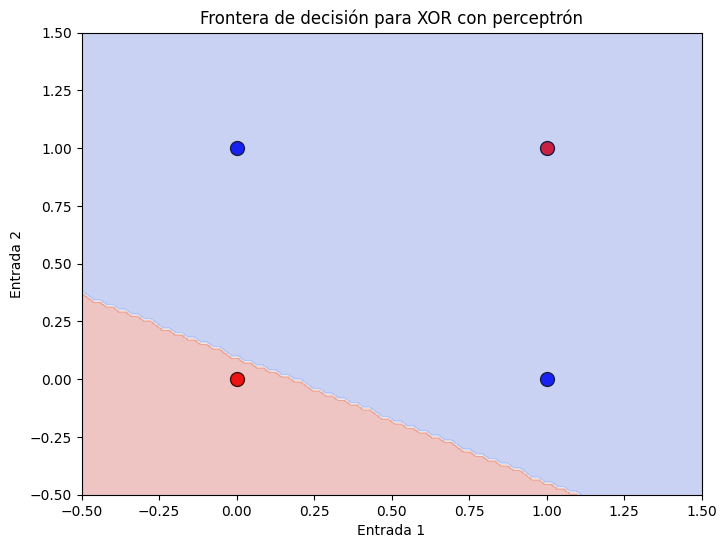

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Implementar el perceptrón con pesos manuales para clasificar el problema de XOR, utiliza la ecuación de la recta para calcular los pesos
def perceptron(entrada, pesos, bias):
    """
    Implementación del perceptrón simple con función escalón.
    Calcula la sumatoria ponderada y aplica un umbral en 0.
    """
    neta = np.dot(entrada, pesos) + bias
    return 1 if neta > 0 else 0

def manual_xor():
    """
    Implementa un perceptrón con pesos manuales para resolver XOR.
    Utiliza dos perceptrones para simular una red multicapa sin entrenar los pesos.
    """
    # Pesos diseñados manualmente para resolver XOR
    # XOR no es linealmente separable, pero podemos combinar dos perceptrones:
    pesos_n1 = np.array([1, 1])  # Detecta OR
    bias_n1 = -0.5
    pesos_n2 = np.array([-1, -1])  # Detecta NAND
    bias_n2 = 1.5
    pesos_salida = np.array([1, 1])  # Combina los resultados de OR y NAND
    bias_salida = -1

    entradas = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

    print("\nSolución de XOR con pesos manuales:")
    for entrada in entradas:
        n1 = perceptron(entrada, pesos_n1, bias_n1)
        n2 = perceptron(entrada, pesos_n2, bias_n2)
        salida = perceptron(np.array([n1, n2]), pesos_salida, bias_salida)
        print(f"Entrada: {entrada}, Salida: {salida}")

# 2. En otro modelo, inicializa los pesos de manera aleatoria y entrena por separado cada perceptrón
def entrenamiento(entradas, target, pesos, bias, tasa_aprendizaje, max_iter=100):
    """
    Entrena un perceptrón ajustando los pesos y el bias con la regla de aprendizaje.
    Se detiene cuando el error se reduce a cero o se alcanza el número máximo de iteraciones.
    """
    for _ in range(max_iter):
        errores = 0
        for i in range(len(entradas)):
            salida = perceptron(entradas[i], pesos, bias)
            error = target[i] - salida
            pesos += tasa_aprendizaje * error * entradas[i]
            bias += tasa_aprendizaje * error
            errores += abs(error)
        if errores == 0:
            break
    return pesos, bias

def entrenar_xor():
    """
    Entrena dos perceptrones por separado para simular una red neuronal simple y resolver XOR.
    """
    entradas = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    target_n1 = np.array([0, 1, 1, 1])  # OR
    target_n2 = np.array([1, 1, 1, 0])  # NAND

    # Inicializar pesos aleatorios
    pesos_n1 = np.random.rand(2)
    bias_n1 = np.random.rand()
    pesos_n2 = np.random.rand(2)
    bias_n2 = np.random.rand()

    tasa_aprendizaje = 0.1

    # Entrenar perceptrones
    pesos_n1, bias_n1 = entrenamiento(entradas, target_n1, pesos_n1, bias_n1, tasa_aprendizaje)
    pesos_n2, bias_n2 = entrenamiento(entradas, target_n2, pesos_n2, bias_n2, tasa_aprendizaje)

    # Perceptrón final que combina los resultados
    target_salida = np.array([0, 1, 1, 0])  # XOR
    pesos_salida = np.random.rand(2)
    bias_salida = np.random.rand()
    pesos_salida, bias_salida = entrenamiento(entradas, target_salida, pesos_salida, bias_salida, tasa_aprendizaje)

    return pesos_n1, bias_n1, pesos_n2, bias_n2, pesos_salida, bias_salida, entradas

# 3. Utilizar los perceptrones ya entrenados para resolver el XOR
def evaluar_xor(pesos_n1, bias_n1, pesos_n2, bias_n2, pesos_salida, bias_salida, entradas):
    """
    Evalúa la red neuronal con los perceptrones entrenados para resolver XOR.
    """
    print("\nEvaluación de XOR con perceptrones entrenados:")
    for entrada in entradas:
        n1 = perceptron(entrada, pesos_n1, bias_n1)
        n2 = perceptron(entrada, pesos_n2, bias_n2)
        salida = perceptron(np.array([n1, n2]), pesos_salida, bias_salida)
        print(f"Entrada: {entrada}, Salida: {salida}")

# 4. Graficar las fronteras de decisión de cada implementación
def graficar_frontera_xor(pesos_n1, bias_n1, pesos_n2, bias_n2, pesos_salida, bias_salida, entradas):
    """
    Grafica las fronteras de decisión de los perceptrones entrenados para XOR.
    """
    plt.figure(figsize=(8, 6))

    # Dibujar puntos de datos
    colores = ['red' if target == 0 else 'blue' for target in [0, 1, 1, 0]]
    for i, entrada in enumerate(entradas):
        plt.scatter(entrada[0], entrada[1], color=colores[i], s=100, edgecolors='k')

    # Crear una malla de puntos
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = np.array([perceptron(np.array([perceptron([a, b], pesos_n1, bias_n1), perceptron([a, b], pesos_n2, bias_n2)]), pesos_salida, bias_salida) for a, b in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    # Dibujar la frontera de decisión
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    plt.xlabel("Entrada 1")
    plt.ylabel("Entrada 2")
    plt.title("Frontera de decisión para XOR con perceptrón")
    plt.show()

# Ejecutar las pruebas de XOR
manual_xor()
pesos_n1, bias_n1, pesos_n2, bias_n2, pesos_salida, bias_salida, entradas = entrenar_xor()
evaluar_xor(pesos_n1, bias_n1, pesos_n2, bias_n2, pesos_salida, bias_salida, entradas)
graficar_frontera_xor(pesos_n1, bias_n1, pesos_n2, bias_n2, pesos_salida, bias_salida, entradas)
